# 实验二 分类算法

In [1]:
# 下载字体
!wget https://github.com/wkwbk/ipynb/raw/main/%E6%95%B0%E6%8D%AE%E9%87%87%E9%9B%86/SimHei.ttf

--2025-04-29 05:39:35--  https://github.com/wkwbk/ipynb/raw/main/%E6%95%B0%E6%8D%AE%E9%87%87%E9%9B%86/SimHei.ttf
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wkwbk/ipynb/main/%E6%95%B0%E6%8D%AE%E9%87%87%E9%9B%86/SimHei.ttf [following]
--2025-04-29 05:39:36--  https://raw.githubusercontent.com/wkwbk/ipynb/main/%E6%95%B0%E6%8D%AE%E9%87%87%E9%9B%86/SimHei.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9751960 (9.3M) [application/octet-stream]
Saving to: ‘SimHei.ttf’

SimHei.ttf          100%[===================>]   9.30M  --.-KB/s    in 0.1s    

2025-04-29 05:39:36 (87.0 MB/s) - ‘SimHei.tt

In [2]:
# 添加字体文件
import matplotlib.font_manager as fm

fm.fontManager.addfont('./SimHei.ttf')

# 1. 加载数据集并探索数据

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# 将数据转换为 DataFrame 以便查看
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['species'] = df['target'].map({i: target_names[i] for i in range(3)})
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


# 2. 数据预处理（分割训练集和测试集）

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("训练集大小:", X_train.shape)
print("测试集大小:", X_test.shape)


训练集大小: (120, 4)
测试集大小: (30, 4)


# 3. 使用K近邻算法分类

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 创建模型并训练
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 预测并评估
y_pred = knn.predict(X_test)
print("准确率:", accuracy_score(y_test, y_pred))
print("混淆矩阵:\n", confusion_matrix(y_test, y_pred))
print("分类报告:\n", classification_report(y_test, y_pred, target_names=target_names))


准确率: 1.0
混淆矩阵:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
分类报告:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 4. 使用支持向量机(SVM)分类

In [6]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("准确率:", accuracy_score(y_test, y_pred))


准确率: 1.0


# 5. 使用逻辑回归分类

In [7]:
from sklearn.linear_model import LogisticRegression

# multi_class 参数在 LogisticRegression 中已经不推荐使用了，并且将在未来的版本（1.7）中移除。
# 建议您不再显式设置此参数，而是让它使用默认值，这样可以避免此警告。
# lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
lr = LogisticRegression(solver='lbfgs', max_iter=200)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("准确率:", accuracy_score(y_test, y_pred))
print("分类报告:\n", classification_report(y_test, y_pred,
                                           target_names=target_names))


准确率: 1.0
分类报告:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 6. 进阶内容

## 结果可视化(可选)

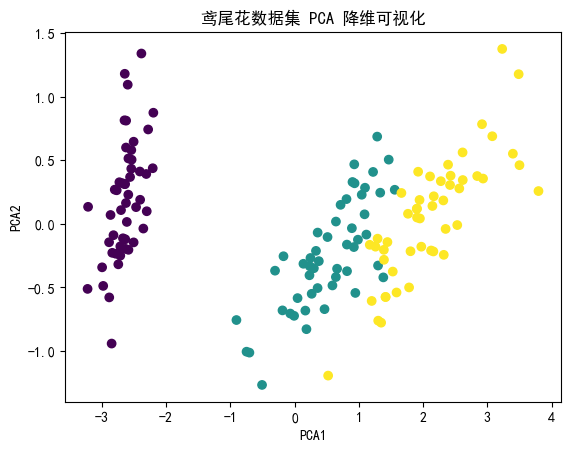

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False

# 降维可视化
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('鸢尾花数据集 PCA 降维可视化')
plt.show()


## 手动实现逻辑回归(多分类)

In [9]:
import numpy as np


class ManualLogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        y_onehot = np.eye(n_classes)[y]

        # 初始化参数
        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros(n_classes)

        # 梯度下降
        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            probs = self.softmax(z)
            error = probs - y_onehot

            # 计算梯度
            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error, axis=0)

            # 更新参数
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        probs = self.softmax(z)
        return np.argmax(probs, axis=1)

# 测试手动实现
manual_lr = ManualLogisticRegression(learning_rate=0.1, epochs=1000)
manual_lr.fit(X_train, y_train)
y_pred_manual = manual_lr.predict(X_test)
print("手动逻辑回归准确率:", accuracy_score(y_test, y_pred_manual))


手动逻辑回归准确率: 1.0


## 手动实现 K 近邻（KNN）

In [10]:
from collections import Counter


class ManualKNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = []
        for x in X:
            # 计算欧氏距离
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            # 取最近的k个样本的标签
            k_indices = np.argsort(distances)[:self.k]
            k_labels = self.y_train[k_indices]
            # 多数投票
            most_common = Counter(k_labels).most_common(1)
            y_pred.append(most_common[0][0])
        return np.array(y_pred)


# 测试手动实现
manual_knn = ManualKNN(k=3)
manual_knn.fit(X_train, y_train)
y_pred_manual = manual_knn.predict(X_test)
print("手动 KNN 准确率:", accuracy_score(y_test, y_pred_manual))


手动 KNN 准确率: 1.0
